#Thinkful Data Science Course
##Unit 4: Predicting the Future; 
##Lesson 6: Support Vector Machines

Let's start with the classic classifier example of iris data. First install the "scikit-learn" library into your version of Python. Then you can import the iris data with following code:

In [18]:
from sklearn import datasets
iris = datasets.load_iris()
import pandas as pd

In [ ]:
iris_df = pd.DataFrame()

####Note: 
You'll notice some tasks are completed twice. I didn't like the assignment's way of calling things straight from the dataset, because I found the labeling unclear and  it was easy to lose track of what data you were working with. Therefore, I put everything into a database and called data accordingly.

In [20]:
iris_df['sepal_length'] = iris.data[:,0]
iris_df['sepal_width'] = iris.data[:,1]
iris_df['petal_length'] = iris.data[:,2]
iris_df['petal_width'] = iris.data[:,3]
iris_df['target'] = iris.target
iris_df['target_flower'] = iris.target
iris_df['target_flower'].replace(0, 'setosa', inplace = True)
iris_df['target_flower'].replace(1, 'versicolor', inplace = True)
iris_df['target_flower'].replace(2, 'virginica', inplace = True)
iris_df1 = iris_df[iris_df['target_flower']=='setosa']
iris_df2 = iris_df[iris_df['target_flower']=='versicolor']
iris_df3 = iris_df[iris_df['target_flower']=='virginica']

Now use the following code to plot the petal length and sepal width of the three types of flowers.

In [4]:
%matplotlib inline

<function matplotlib.pyplot.show>

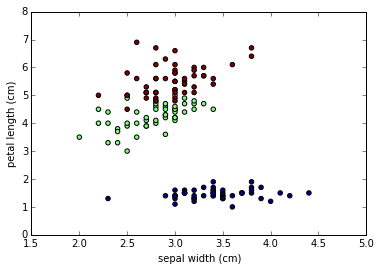

In [9]:
import matplotlib.pyplot as plt
plt.scatter(iris.data[:, 1], iris.data[:, 2], c=iris.target)
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show

<function matplotlib.pyplot.show>

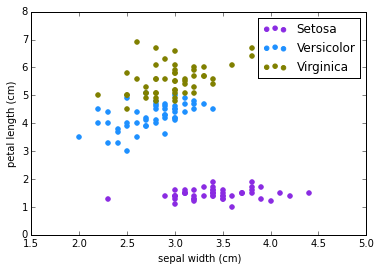

In [27]:
plt.scatter(iris_df1['sepal_width'], iris_df1['petal_length'], label = 'Setosa', color='blueviolet')
plt.scatter(iris_df2['sepal_width'], iris_df2['petal_length'], label = 'Versicolor', color='dodgerblue')
plt.scatter(iris_df3['sepal_width'], iris_df3['petal_length'], label = 'Virginica', color='olive')
plt.legend()
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show

A support vector machine tries to draw boundaries between the various classes (in this case, flowers, distinguished by color) that maximizes the distance between the points and the margin boundary or buffer between the classes. In the plot from above, it seems pretty obvious how to draw a line that would separate one set of flowers (setosa) from the rest but it may not be clear how to say separate the two flower types (virginica, versicolor) from each other.

Let us simplify the example a little and choose only two of the flowers.

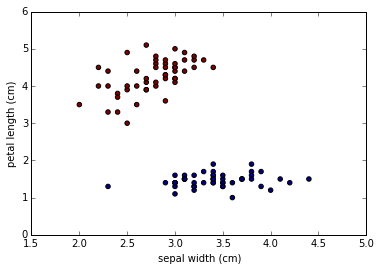

In [11]:
#The first 100 observations correspond to setosa and versicolor
plt.scatter(iris.data[0:100, 1], iris.data[0:100, 2], c=iris.target[0:100])
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])

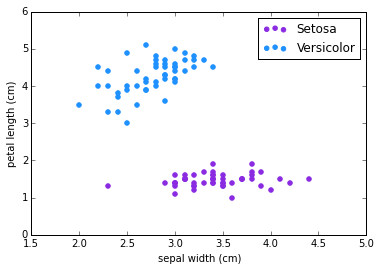

In [28]:
plt.scatter(iris_df1['sepal_width'], iris_df1['petal_length'], label = 'Setosa', color='blueviolet')
plt.scatter(iris_df2['sepal_width'], iris_df2['petal_length'], label = 'Versicolor', color='dodgerblue')
plt.legend()
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

With these two type of flowers, we can see a clear separation given the two fields we have available. We can then simply apply the SVC module as thus:

In [12]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
from sklearn import datasets
X = iris.data[0:100, 1:3]
y = iris.target[0:100]
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In order to visualize the results, we have to add a few elements to the above graphs.

In [93]:
import numpy as np

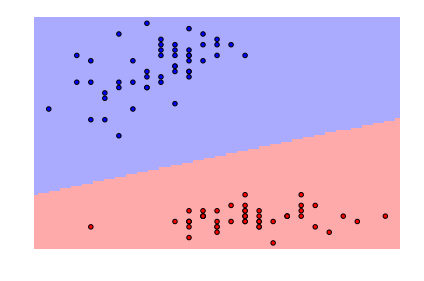

In [94]:
#Adapted from https://github.com/jakevdp/sklearn_scipy2013
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

plot_estimator(svc, X, y)

In [168]:
#Using dataframe calls instead
from sklearn import svm
svc = svm.SVC(kernel='linear')
from sklearn import datasets
z= iris_df1
Z = z.append(iris_df2, ignore_index=True)
X = Z[['sepal_width', 'petal_length']].as_matrix()
y = Z['target'].as_matrix()

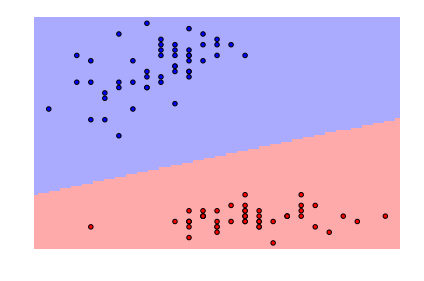

In [169]:
plot_estimator(svc, X, y)

The graph (above) draws the boundary determined by the SVM and shades in the entire area delineated by this boundary. In the case of the two flowers selected, the boundary is clean and there are no misclassifications.

If we repeat the above procedures (the SVM calculation) for the versicolor and virginica flowers, we will see the boundary drawn fails to correctly classify some cases of flowers. This is because the types of flowers do not necessary have a clean linear boundary in the two dimensions we have chosen.

In [99]:
X = iris.data[50:, 1:3]
#takes just versicolor and setosa flowers, and just the sepal width and petal length
y = iris_df['target'][0:100]
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

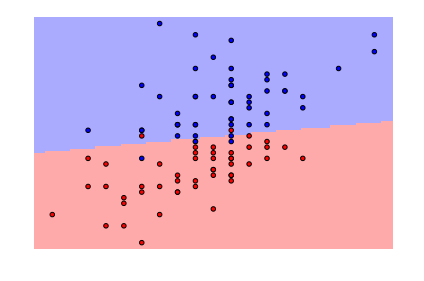

In [100]:
plot_estimator(svc, X, y)

The drawing of boundaries can be subject to overfitting, or being overly sensitive to a handful of influential observations. To deal with this, SVMs are usually calculated with soft margins or boundaries. In Python code, the size of the boundary is expressed as the parameter "c" as in:

svc = svm.SVC(kernel='linear', c=1)

The default value for c is 1, and increasing values widen this margin, effectively increasing the bias of the classification.

##Challenge

Run SVMs along with the visualization from the Overview for all the combinations of fields (there are four) for each combination of flower types (there are three). Are there clear boundaries between the flower types based on the various combinations of fields? Is there a particular combination that separates a flower type cleanly? Is there a particular combination that separates the flower types almost cleanly?
Run SVM code for classifying three flowers at a time. How is the code different?
Try adjusting the code for a wider soft margin. Focus on classifying flowers without clean boundaries. How does a wider margin help? Is there a point where the margin becomes too wide? Too narrow?

###Setosa and Versicolor
####Sepal Length vs Sepal Width

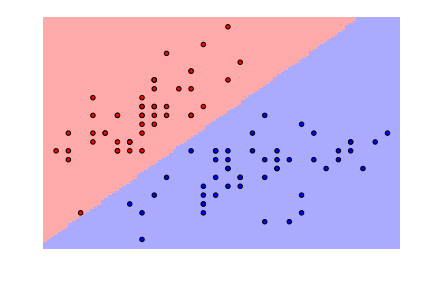

In [145]:
#Selecting and preparing the appropriate data
z= iris_df1
Z = z.append(iris_df2, ignore_index=True)
X = Z[['sepal_length', 'sepal_width']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Length vs Petal Length

In [152]:
#Selecting and preparing the appropriate data
z= iris_df1
Z = z.append(iris_df2, ignore_index=True)
X = Z[['sepal_length', 'petal_length']].as_matrix()


In [153]:
y = Z['target'].as_matrix()

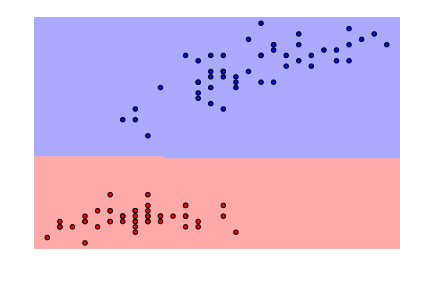

In [154]:
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Length vs Petal Width

In [143]:
#Selecting and preparing the appropriate data
X = Z[['sepal_length', 'petal_width']].as_matrix()
y = Z['target'].as_matrix()

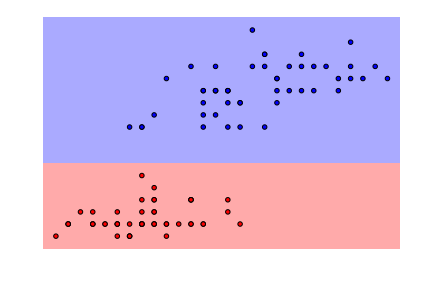

In [144]:
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Width vs Petal Length

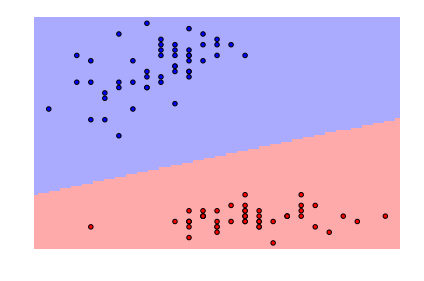

In [146]:
#Selecting and preparing the appropriate data
X = Z[['sepal_width', 'petal_length']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Width vs Petal Width

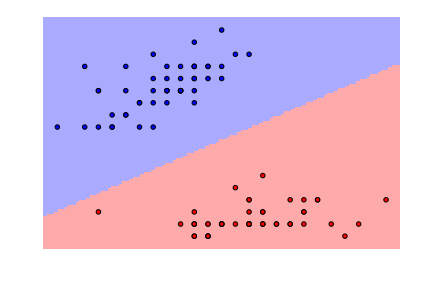

In [147]:
#Selecting and preparing the appropriate data
X = Z[['sepal_width', 'petal_width']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Petal Length vs Petal Width

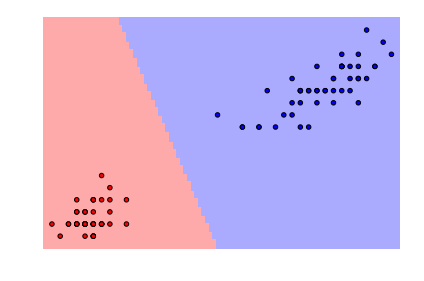

In [148]:
#Selecting and preparing the appropriate data
X = Z[['petal_length', 'petal_width']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

###Setosa and Virginica
####Sepal Length vs Sepal Width

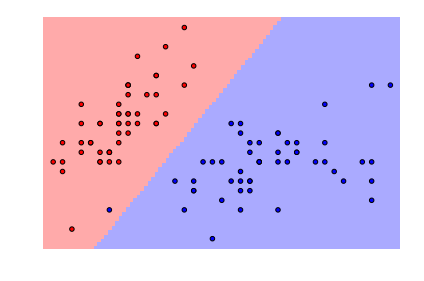

In [155]:
#Selecting and preparing the appropriate data
z= iris_df1
Z = z.append(iris_df3, ignore_index=True)
X = Z[['sepal_length', 'sepal_width']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Length vs Petal Length

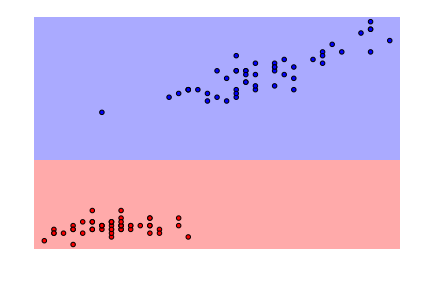

In [157]:
X = Z[['sepal_length', 'petal_length']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Length vs Petal Width

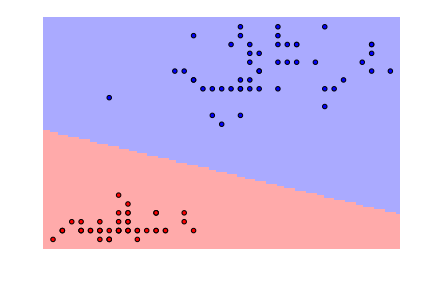

In [158]:
X = Z[['sepal_length', 'petal_width']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Width vs Petal Length

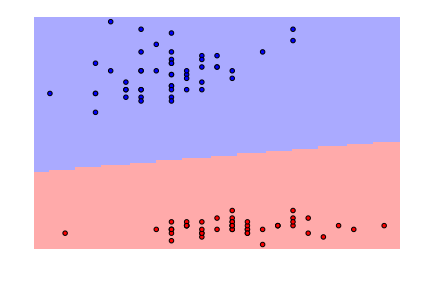

In [159]:
X = Z[['sepal_width', 'petal_length']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Width vs Petal Width

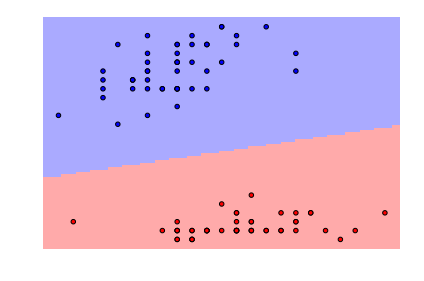

In [160]:
X = Z[['sepal_width', 'petal_width']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Petal Length vs Petal Width

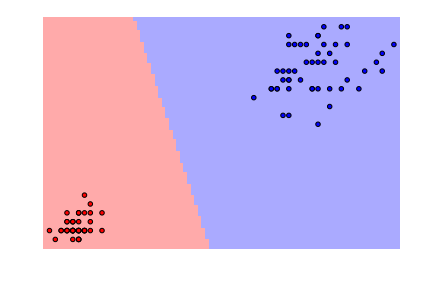

In [161]:
X = Z[['petal_length', 'petal_width']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

###Versicolor and Virginica
####Sepal Length vs Sepal Width

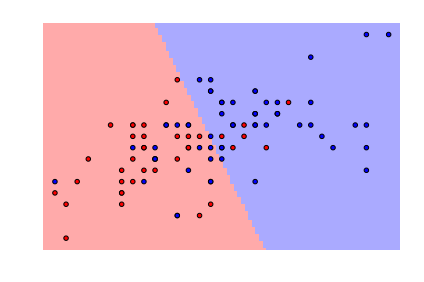

In [162]:
#Selecting and preparing the appropriate data
z= iris_df2
Z = z.append(iris_df3, ignore_index=True)
X = Z[['sepal_length', 'sepal_width']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Length vs Petal Length

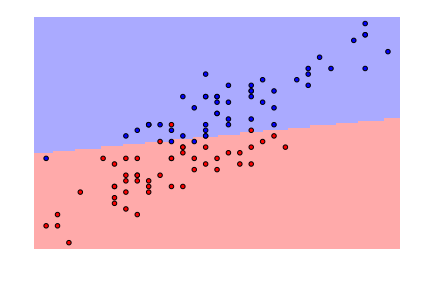

In [163]:
X = Z[['sepal_length', 'petal_length']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Length vs Petal Width

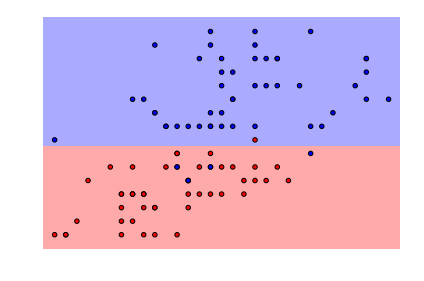

In [164]:
X = Z[['sepal_length', 'petal_width']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Width vs Petal Length

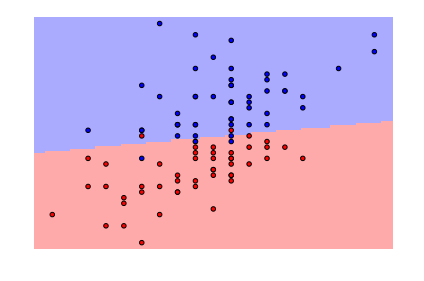

In [165]:
X = Z[['sepal_width', 'petal_length']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Width vs Petal Width

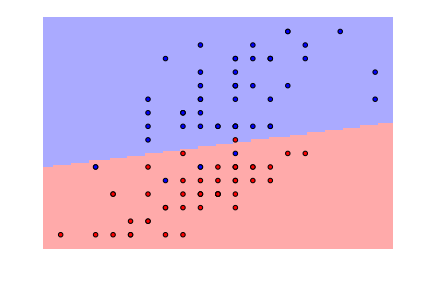

In [166]:
X = Z[['sepal_width', 'petal_width']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Petal Width vs Petal Length

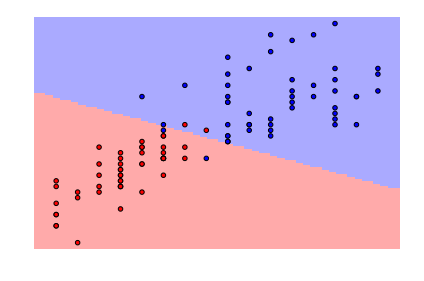

In [167]:
X = Z[['petal_width', 'petal_length']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

###Questions
####Are there clear boundaries between the flower types based on the various combinations of fields?
The boundaries are ver clear when comparing Setosa to Versicolor and when comparing Setosa to Virginica; however, when comparing Versicolor and Verginica, the boundaries are not so clear-cut.

####Is there a particular combination that separates a flower type cleanly?
Setosa & Versicolor; Setosa & Virginica

####Is there a particular combination that separates the flower types almost cleanly?
Versicolor and Virginica

###Run SVM code for classifying three flowers at a time.

####Sepal Length vs Sepal Width

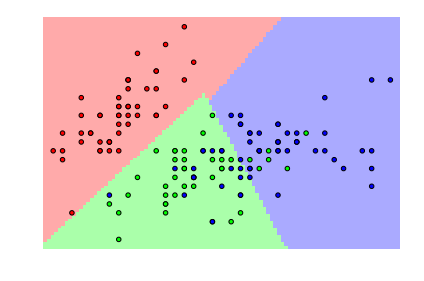

In [171]:
X = iris_df[['sepal_length', 'sepal_width']].as_matrix()
y = iris_df['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Length vs Petal Length

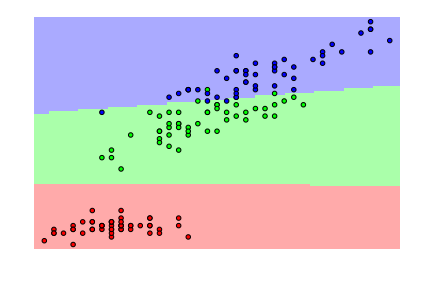

In [172]:
X = iris_df[['sepal_length', 'petal_length']].as_matrix()
y = iris_df['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Length vs Petal Width

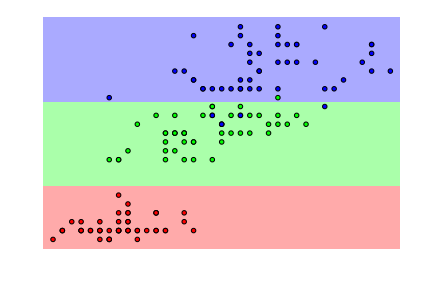

In [173]:
X = iris_df[['sepal_length', 'petal_width']].as_matrix()
y = iris_df['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Width vs Petal Length

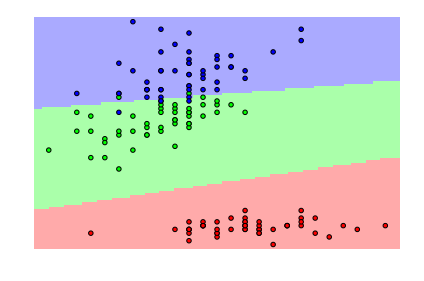

In [174]:
X = iris_df[['sepal_width', 'petal_length']].as_matrix()
y = iris_df['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Sepal Width vs Petal Width

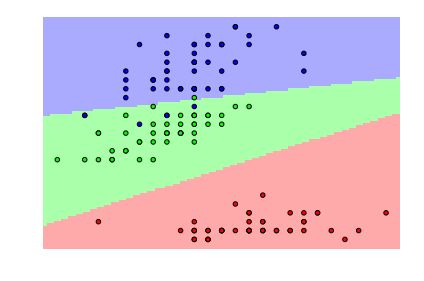

In [175]:
X = iris_df[['sepal_width', 'petal_width']].as_matrix()
y = iris_df['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

####Petal Length vs Petal Width

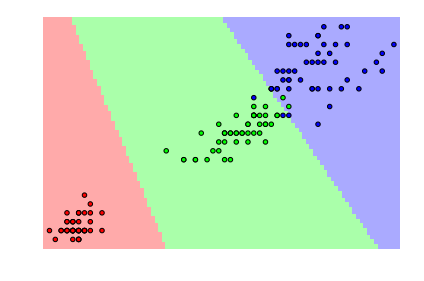

In [176]:
X = iris_df[['petal_length', 'petal_width']].as_matrix()
y = iris_df['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

###Questions:
####Run SVM code for classifying three flowers at a time. How is the code different?
The SVM code is not different. The only difference was in preparing the code to include the appropriate data.

###Adjusting the Margin:
Try adjusting the code for a wider soft margin. Focus on classifying flowers without clean boundaries. How does a wider margin help? Is there a point where the margin becomes too wide? Too narrow?

(The drawing of boundaries can be subject to overfitting, or being overly sensitive to a handful of influential observations. To deal with this, SVMs are usually calculated with soft margins or boundaries. In Python code, the size of the boundary is expressed as the parameter "c" as in:

svc = svm.SVC(kernel='linear', c=1)

The default value for c is 1, and increasing values widen this margin, effectively increasing the bias of the classification.)

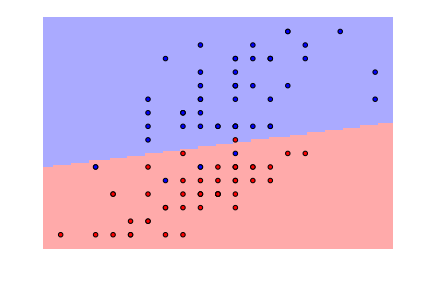

In [182]:
#Using Sepal Width vs Petal Width in Versicolor and Virginica as example

svc = svm.SVC(kernel='linear', C=1)
z= iris_df2
Z = z.append(iris_df3, ignore_index=True)
X = Z[['sepal_length', 'sepal_width']].as_matrix()
X = Z[['sepal_width', 'petal_width']].as_matrix()
y = Z['target'].as_matrix()
svc.fit(X, y)
plot_estimator(svc, X, y)

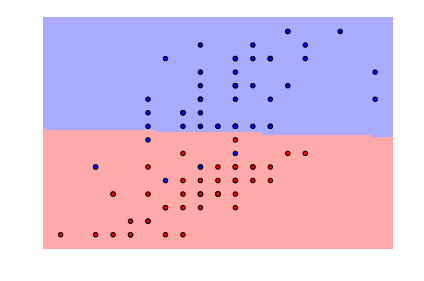

In [183]:
svc = svm.SVC(kernel='linear', C=.1)
svc.fit(X, y)
plot_estimator(svc, X, y)

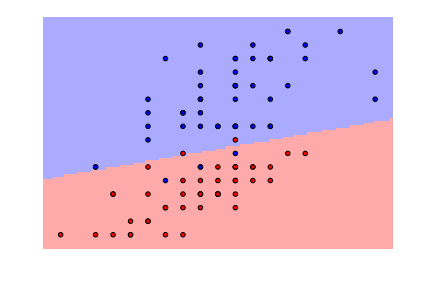

In [184]:
svc = svm.SVC(kernel='linear', C=3)
svc.fit(X, y)
plot_estimator(svc, X, y)

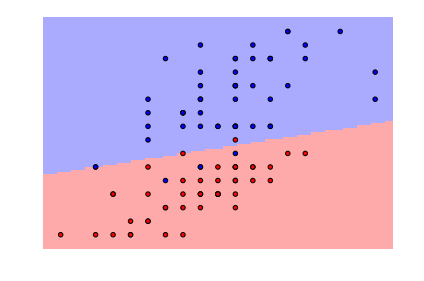

In [185]:
svc = svm.SVC(kernel='linear', C=10)
svc.fit(X, y)
plot_estimator(svc, X, y)

####How does a wider margin help? Is there a point where the margin becomes too wide? Too narrow?

A large value of C basically tells our model that we do not have that much faith in our data’s distribution, and will only consider points close to line of separation. 

A small value of C includes more/all the observations, allowing the margins to be calculated using all the data in the area

At some point, continuing to increase the value of C no longer makes any significant changes to the line of separation between groupings.